In [ ]:
# ==============================================================================
# STEP 1: SETUP AND INSTALLATION
# ==============================================================================
import os
import subprocess
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import defaultdict
from google.colab import userdata


# --- Check for Snyk Token ---
try:
    SNYK_TOKEN = userdata.get('SNYK_TOKEN')
    print(" Snyk token found in Colab secrets.")
except userdata.SecretNotFoundError:
    print(" ERROR: Snyk token not found!")
    print("Please add your Snyk API token to Colab secrets with the name 'SNYK_TOKEN'.")
    # Stop execution if the token is missing
    raise SystemExit("Snyk token is required to proceed.")


# --- Install Python packages ---
print("\nInstalling Python packages: bandit, semgrep, pandas...")
!pip install -q bandit semgrep pandas matplotlib seaborn

# --- Define repositories and tools ---
# *** THIS SECTION HAS BEEN UPDATED WITH YOUR NEW REPOSITORIES ***
REPOS = {
    "qlib": "https://github.com/microsoft/qlib.git",
    "opentelemetry-python": "https://github.com/open-telemetry/opentelemetry-python.git",
    "modin": "https://github.com/modin-project/modin.git"
}
TOOLS = ["Bandit", "Semgrep", "Snyk Code"]
# The CWE Top 25 list might change. This is for the 2024 version.
CWE_TOP_25_2024 = {
    "CWE-79", "CWE-89", "CWE-416", "CWE-78", "CWE-787", "CWE-22", "CWE-287",
    "CWE-434", "CWE-77", "CWE-190", "CWE-476", "CWE-276", "CWE-502", "CWE-20",
    "CWE-125", "CWE-862", "CWE-352", "CWE-269", "CWE-918", "CWE-362", "CWE-295",
    "CWE-94", "CWE-863", "CWE-400", "CWE-306"
}

# --- Clone repositories ---
print("\nCloning GitHub repositories...")
for name, url in REPOS.items():
    if not os.path.isdir(name):
        print(f"  Cloning {name}...")
        subprocess.run(["git", "clone", url, name], check=True, capture_output=True)
    else:
        print(f"  Repository {name} already exists.")

# --- Setup Snyk CLI ---
print("\nSetting up Snyk CLI...")
if not os.path.exists("snyk"):
    SNYK_URL = "https://static.snyk.io/cli/latest/snyk-linux"
    print("  Downloading Snyk...")
    subprocess.run(["wget", "-q", "-O", "snyk", SNYK_URL], check=True)
    print("  Making Snyk executable...")
    subprocess.run(["chmod", "+x", "snyk"], check=True)
else:
    print("  Snyk CLI already downloaded.")

# --- Authenticate Snyk ---
print("\nAuthenticating Snyk...")
snyk_auth_result = subprocess.run(["./snyk", "auth", SNYK_TOKEN], capture_output=True, text=True)
if "Your account has been authenticated" in snyk_auth_result.stdout:
    print("  Snyk authenticated successfully!")
else:
    print("  Snyk authentication failed. Please check your token.")
    print(snyk_auth_result.stderr)
    raise SystemExit("Snyk authentication failed.")


print("\n Setup complete!")

 Snyk token found in Colab secrets.

Installing Python packages: bandit, semgrep, pandas...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.8/133.8 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 754.1/754.1 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.7/193.7 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.7/100.7 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.7/84.7 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.8/239.8 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# ==============================================================================
# STEP 2 (FINAL CORRECTION): RUN TOOLS AND CONSOLIDATE RESULTS
# ==============================================================================
import subprocess
import json
import os
import re
from collections import defaultdict

def run_and_parse_scans():
    """Runs all tools on all repos and returns a consolidated list of findings."""
    all_findings = []

    for project_name in REPOS.keys():
        print(f"\n--- Scanning Project: {project_name} ---")
        repo_path = os.path.join(os.getcwd(), project_name)

        # --- Run Bandit (No changes here) ---
        print(f"  Running Bandit on {project_name}...")
        # ... (Bandit code is correct and unchanged) ...
        bandit_output_file = f"{project_name}_bandit.json"
        subprocess.run(["bandit", "-r", repo_path, "-f", "json", "-o", bandit_output_file], capture_output=True)
        try:
            with open(bandit_output_file) as f:
                data = json.load(f)
            cwe_counts = defaultdict(int)
            for result in data.get("results", []):
                cwe_id = result.get("issue_cwe", {}).get("id")
                if cwe_id:
                    cwe_counts[f"CWE-{cwe_id}"] += 1
            for cwe, count in cwe_counts.items():
                all_findings.append({
                    "Project_name": project_name, "Tool_name": "Bandit", "CWE_ID": cwe,
                    "Number of Findings": count
                })
        except (json.JSONDecodeError, FileNotFoundError):
            print(f"    Bandit produced no valid output for {project_name}.")

        # --- Run Semgrep (No changes here) ---
        print(f"  Running Semgrep on {project_name}...")
        # ... (Semgrep code is correct and unchanged) ...
        semgrep_output_file = f"{project_name}_semgrep.json"
        subprocess.run(["semgrep", "scan", "--config", "p/python", repo_path, "--json", "-o", semgrep_output_file], capture_output=True)
        try:
            with open(semgrep_output_file) as f:
                data = json.load(f)
            cwe_counts = defaultdict(int)
            for result in data.get("results", []):
                cwe_raw = result.get("extra", {}).get("metadata", {}).get("cwe")
                cwe_list = cwe_raw if isinstance(cwe_raw, list) else [cwe_raw]
                for cwe_item in cwe_list:
                    if isinstance(cwe_item, str):
                        match = re.search(r'CWE-\d+', cwe_item)
                        if match:
                            cwe_counts[match.group(0)] += 1
            for cwe, count in cwe_counts.items():
                 all_findings.append({
                    "Project_name": project_name, "Tool_name": "Semgrep", "CWE_ID": cwe,
                    "Number of Findings": count
                })
        except (json.JSONDecodeError, FileNotFoundError):
            print(f"    Semgrep produced no valid output for {project_name}.")

        # --- Run Snyk Code (FINAL CORRECTED PARSING LOGIC) ---
        print(f"  Running Snyk Code on {project_name}...")
        snyk_output_file = f"{project_name}_snyk.json"
        result = subprocess.run(
            f"./snyk code test {repo_path} --json > {snyk_output_file}",
            shell=True, capture_output=True, text=True
        )

        if result.returncode not in [0, 1]:
             print(f"    Snyk command failed with exit code {result.returncode}.")
             print(f"    Stderr: {result.stderr}")
        else:
            try:
                with open(snyk_output_file) as f:
                    json_objects = [json.loads(line) for line in f if line.strip()]
                    data = json_objects[-1] if json_objects else {}

                cwe_counts = defaultdict(int)

                # Step 1: Create a map from ruleId to its CWE list
                rule_to_cwe = {}
                rules = data.get("runs", [{}])[0].get("tool", {}).get("driver", {}).get("rules", [])
                for rule in rules:
                    rule_id = rule.get("id")
                    # *** THIS IS THE CORRECTED LINE ***
                    cwe_list = rule.get("properties", {}).get("cwe", [])
                    if rule_id and cwe_list:
                        rule_to_cwe[rule_id] = cwe_list

                # Added a debug print so you can see if the map was built
                if rule_to_cwe:
                    print(f"    [DEBUG] Successfully built Snyk rule-to-CWE map: {rule_to_cwe}")

                # Step 2: Iterate through results and use the map to find the CWE
                results = data.get("runs", [{}])[0].get("results", [])
                for res in results:
                    rule_id = res.get("ruleId")
                    if rule_id in rule_to_cwe:
                        for cwe_id in rule_to_cwe[rule_id]:
                            cwe_counts[cwe_id] += 1

                for cwe, count in cwe_counts.items():
                    all_findings.append({
                        "Project_name": project_name, "Tool_name": "Snyk Code", "CWE_ID": cwe,
                        "Number of Findings": count
                    })

            except (json.JSONDecodeError, FileNotFoundError, IndexError, KeyError):
                print(f"    Snyk ran but its output could not be parsed for {project_name}.")

    return all_findings

# --- Execute scanning and create the final CSV ---
print("🚀 Starting SAST scans...")
findings_data = run_and_parse_scans()

if findings_data:
    df = pd.DataFrame(findings_data)
    df["Is_In_CWE_Top_25?"] = df["CWE_ID"].isin(CWE_TOP_25_2024)

    # Save to CSV
    consolidated_csv_path = "consolidated_sast_findings.csv"
    df.to_csv(consolidated_csv_path, index=False)

    print(f"\n All scans complete. Consolidated results saved to '{consolidated_csv_path}'.")
    display(df.head())
else:
    print("\n No findings were generated by any tool. Analysis cannot proceed.")

🚀 Starting SAST scans...

--- Scanning Project: tiktok-api ---
  Running Bandit on tiktok-api...
  Running Semgrep on tiktok-api...
  Running Snyk Code on tiktok-api...
    [DEBUG] Successfully built Snyk rule-to-CWE map: {'python/NoHardcodedCredentials/test': ['CWE-798']}

--- Scanning Project: stable-baselines3 ---
  Running Bandit on stable-baselines3...
  Running Semgrep on stable-baselines3...
  Running Snyk Code on stable-baselines3...

--- Scanning Project: tqsdk-python ---
  Running Bandit on tqsdk-python...
  Running Semgrep on tqsdk-python...
  Running Snyk Code on tqsdk-python...
    [DEBUG] Successfully built Snyk rule-to-CWE map: {'javascript/InsufficientPostmessageValidation': ['CWE-20'], 'python/BindToAllNetworkInterfaces': ['CWE-284'], 'python/HardcodedNonCryptoSecret': ['CWE-547'], 'python/InsecureHash': ['CWE-916'], 'python/NoHardcodedPasswords': ['CWE-798', 'CWE-259'], 'python/incomplete~url~sanitazation': ['CWE-20']}

 All scans complete. Consolidated results saved 

,Project_name,Tool_name,CWE_ID,Number of Findings,Is_In_CWE_Top_25?
0,tiktok-api,Bandit,CWE-400,3,True
1,tiktok-api,Bandit,CWE-330,12,False
2,tiktok-api,Bandit,CWE-703,38,False
3,tiktok-api,Snyk Code,CWE-798,3,False
4,stable-baselines3,Bandit,CWE-703,903,False


🚀 Performing Tool-level CWE Coverage Analysis...

--- CWE Top 25 Coverage Results ---
     Tool  Top 25 Coverage (%)        Top 25 CWEs Found
   Bandit                 12.0 CWE-400, CWE-502, CWE-78
  Semgrep                  4.0                  CWE-287
Snyk Code                  4.0                   CWE-20


/tmp/ipython-input-2662726297.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coverage_df, x="Tool", y="Top 25 Coverage (%)", ax=ax, palette="viridis")


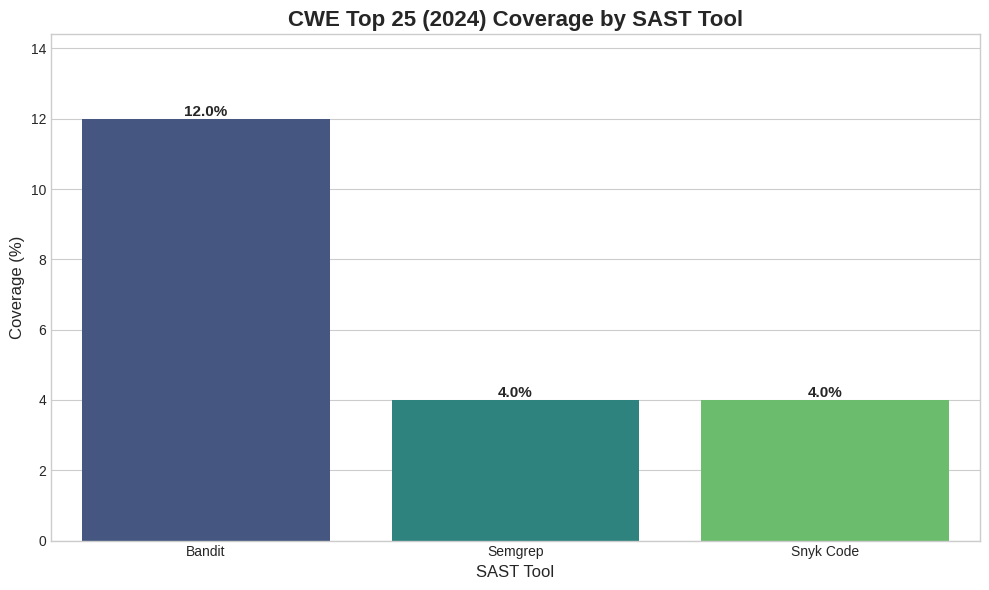

In [ ]:
# ==============================================================================
# STEP 3: CWE COVERAGE ANALYSIS
# ==============================================================================
if 'df' in locals() and not df.empty:
    print("🚀 Performing Tool-level CWE Coverage Analysis...")

    # Extract unique CWEs found by each tool
    tool_cwe_sets = df.groupby('Tool_name')['CWE_ID'].unique().apply(set).to_dict()

    coverage_data = []
    for tool in TOOLS:
        cwe_set = tool_cwe_sets.get(tool, set()) # Handle case where a tool finds nothing
        # Find intersection with Top 25
        top_25_found = cwe_set.intersection(CWE_TOP_25_2024)
        coverage_percent = (len(top_25_found) / len(CWE_TOP_25_2024)) * 100
        coverage_data.append({
            "Tool": tool,
            "Top 25 Coverage (%)": coverage_percent,
            "Top 25 CWEs Found": ", ".join(sorted(list(top_25_found))) if top_25_found else "None"
        })

    coverage_df = pd.DataFrame(coverage_data)
    print("\n--- CWE Top 25 Coverage Results ---")
    print(coverage_df.to_string(index=False))

    # --- Visualize the coverage ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(data=coverage_df, x="Tool", y="Top 25 Coverage (%)", ax=ax, palette="viridis")

    ax.set_title('CWE Top 25 (2024) Coverage by SAST Tool', fontsize=16, weight='bold')
    ax.set_xlabel('SAST Tool', fontsize=12)
    ax.set_ylabel('Coverage (%)', fontsize=12)
    # Set y-axis limit to a bit more than the max value, or 10 if max is 0
    max_coverage = coverage_df["Top 25 Coverage (%)"].max()
    ax.set_ylim(0, max(10, max_coverage * 1.2))


    # Add percentage labels on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', fontsize=11, weight='bold')

    plt.tight_layout()
    plt.show()

else:
    print("DataFrame not found. Please run Step 2 successfully first.")

In [ ]:
coverage_df

,Tool,Top 25 Coverage (%),Top 25 CWEs Found
0,Bandit,12.0,"CWE-400, CWE-502, CWE-78"
1,Semgrep,4.0,CWE-287
2,Snyk Code,4.0,CWE-20


In [ ]:
!pip install pywaffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 85.0 MB/s eta 0:00:00



🚀 Visualizing CWE Coverage with a Waffle Chart (Corrected)...


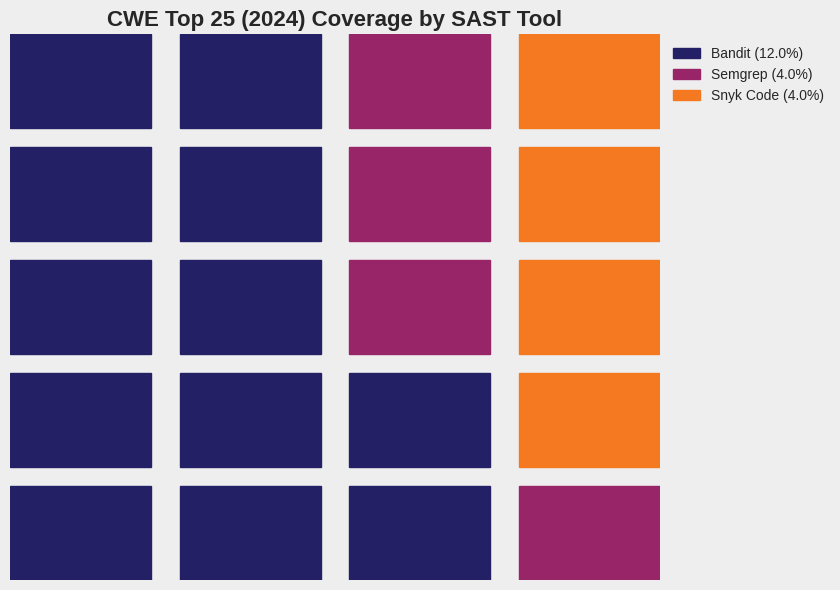

In [ ]:
from pywaffle import Waffle
import matplotlib.pyplot as plt

if 'coverage_df' in locals():
    print("\n🚀 Visualizing CWE Coverage with a Waffle Chart (Corrected)...")

    # Prepare the data for the waffle chart
    data = coverage_df.set_index('Tool')['Top 25 Coverage (%)'].to_dict()
    labels = [f"{k} ({v:.1f}%)" for k, v in data.items()]

    # Explicitly create the figure and axes first
    fig, ax = plt.subplots(figsize=(10, 6), facecolor='#EEEEEE')
    ax.set_facecolor('#EEEEEE')

    # Pass the axis to the Waffle function
    Waffle.make_waffle(
        ax=ax,  # <-- This is the key change
        rows=5, # Each row represents 20%
        values=data,
        labels=labels,
        legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
        colors=("#232066", "#982568", "#F47920") # Custom colors for the tools
    )

    # Add the title directly to the axis
    ax.set_title(
        'CWE Top 25 (2024) Coverage by SAST Tool',
        loc='center',
        fontsize=16,
        fontweight='bold'
    )

    # Ensure the layout is tight before showing
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust rect to make space for legend
    plt.show()

else:
    print("DataFrame 'coverage_df' not found. Please run the previous analysis step first.")


🚀 Performing Pairwise Agreement (IoU) Analysis...

--- Tool × Tool IoU Matrix (Jaccard Index) ---


,Bandit,Semgrep,Snyk Code
Bandit,1.000,0.100,0.077
Semgrep,0.100,1.000,0.000
Snyk Code,0.077,0.000,1.000


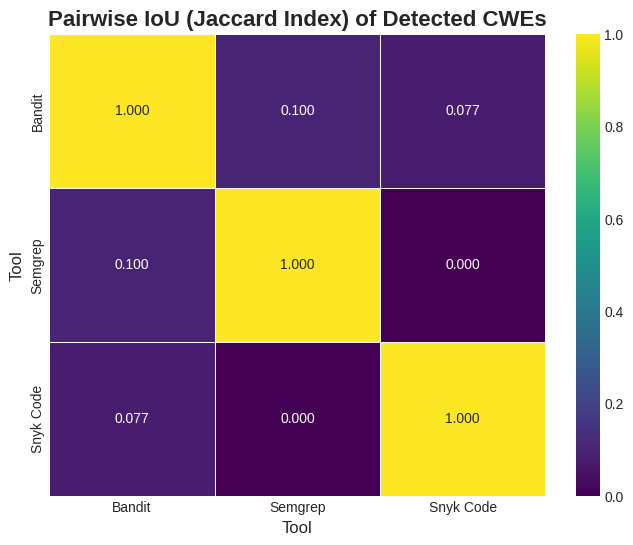

In [ ]:
# ==============================================================================
# STEP 4: PAIRWISE AGREEMENT (IOU) ANALYSIS
# ==============================================================================
if 'df' in locals() and not df.empty:
    print("\n🚀 Performing Pairwise Agreement (IoU) Analysis...")

    if 'tool_cwe_sets' not in locals():
        tool_cwe_sets = df.groupby('Tool_name')['CWE_ID'].unique().apply(set).to_dict()

    iou_matrix = pd.DataFrame(np.zeros((len(TOOLS), len(TOOLS))),
                              index=TOOLS, columns=TOOLS)

    # Calculate Jaccard Index for each pair
    for i in range(len(TOOLS)):
        for j in range(len(TOOLS)):
            tool1 = TOOLS[i]
            tool2 = TOOLS[j]
            set1 = tool_cwe_sets.get(tool1, set())
            set2 = tool_cwe_sets.get(tool2, set())

            intersection = len(set1.intersection(set2))
            union = len(set1.union(set2))
            iou = intersection / union if union != 0 else 0
            iou_matrix.loc[tool1, tool2] = iou

    print("\n--- Tool × Tool IoU Matrix (Jaccard Index) ---")
    display(iou_matrix.style.background_gradient(cmap='viridis', axis=None).format("{:.3f}"))

    # --- Visualize the IoU Matrix as a Heatmap ---
    plt.figure(figsize=(8, 6))
    sns.heatmap(iou_matrix, annot=True, cmap="viridis", fmt=".3f", linewidths=.5)
    plt.title('Pairwise IoU (Jaccard Index) of Detected CWEs', fontsize=16, weight='bold')
    plt.xlabel('Tool', fontsize=12)
    plt.ylabel('Tool', fontsize=12)
    plt.show()

else:
    print("DataFrame not found. Please run Step 2 successfully first.")

In [ ]:
!cat tiktok-api_snyk.json

{"$schema": "https://docs.oasis-open.org/sarif/sarif/v2.1.0/errata01/os/schemas/sarif-schema-2.1.0.json","version": "2.1.0","runs": [{"tool": {"driver" : {"name" : "SnykCode","semanticVersion" : "1.1299.1","version" : "1.1299.1","informationUri" : "https://docs.snyk.io/","rules" : [{"id": "python/NoHardcodedCredentials/test","name": "NoHardcodedCredentials/test","shortDescription": {"text": "Use of Hardcoded Credentials"},"defaultConfiguration": {"level": "note"},"help": {"markdown": "\n## Details\n\nDevelopers may use hardcoded credentials for convenience when coding in order to simplify their workflow. While they are responsible for removing these before production, occasionally this task may fall through the cracks. This also becomes a maintenance challenge when credentials are re-used across multiple applications.\n\nOnce attackers gain access, they may take advantage of privilege level to remove or alter data, take down a site or app, or hold any of the above for ransom. The risk 